In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [143]:
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [144]:
df_bank = pd.read_csv("data_banknote_authentication.txt", header=None, names=["variance", "skewness", "curtosis", "entropy", "class"])

df_bank

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [145]:
df_bank.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


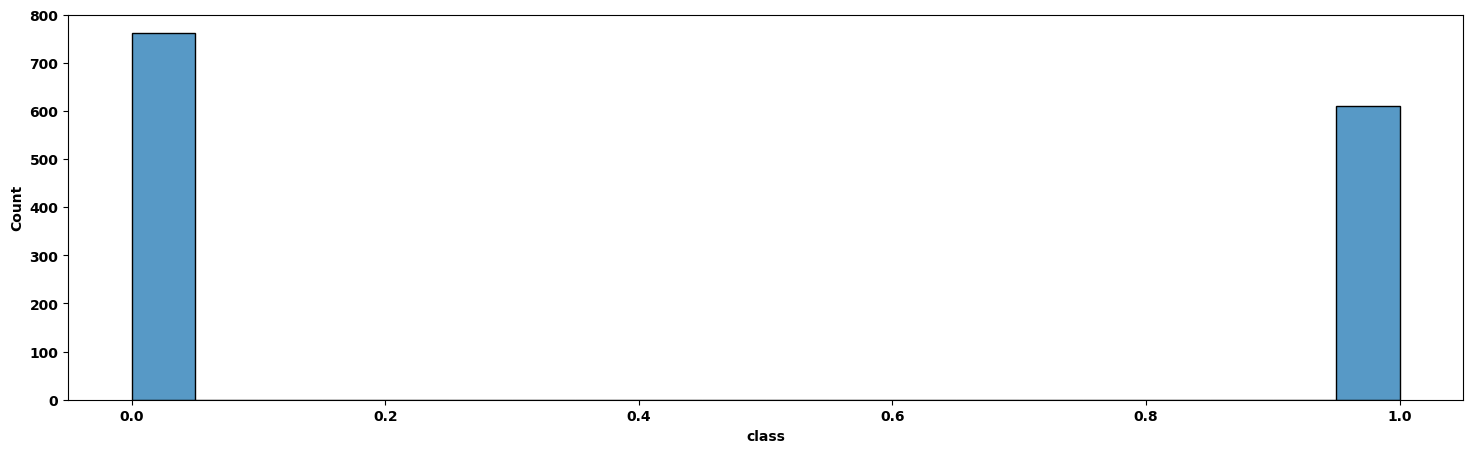

In [146]:
fig, axes = plt.subplots(1, figsize=(18,5))
sns.histplot(df_bank['class'], bins=20)
plt.show()

In [147]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [148]:
df_bank.isna().sum().sum()

0

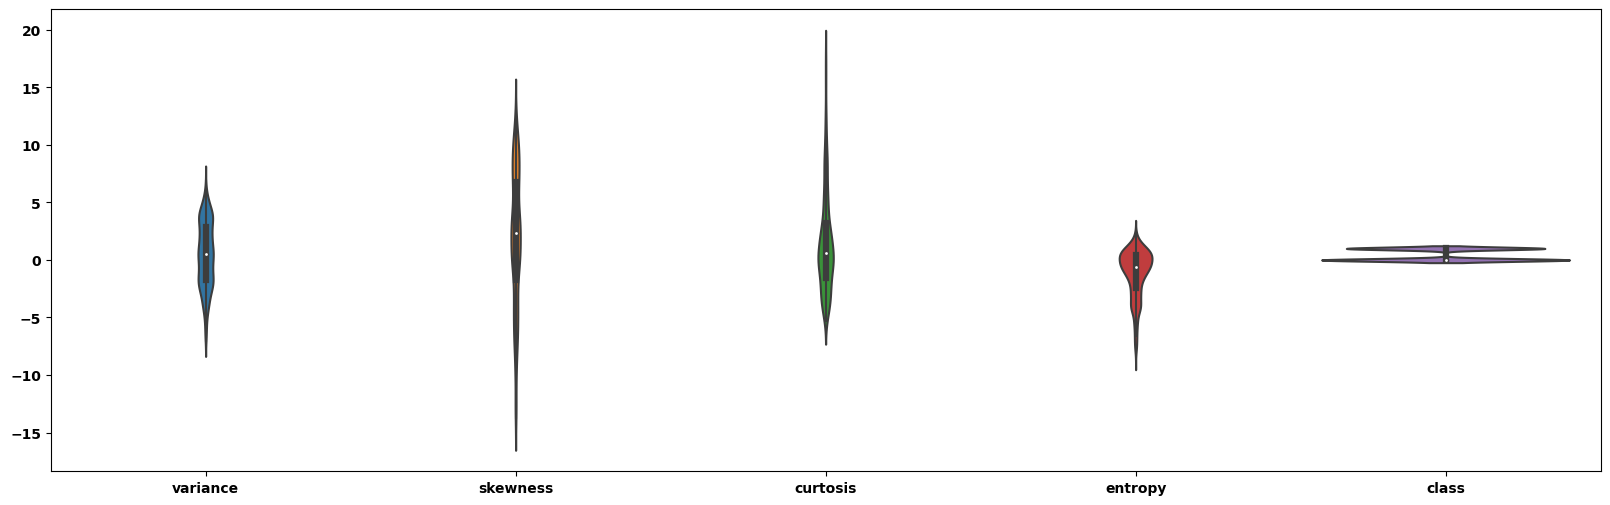

In [149]:
plt.figure(figsize=(20,6))
sns.violinplot(data=df_bank, orient='v')
plt.show()

In [150]:
X = df_bank.drop('class', axis='columns')
y = df_bank['class']

In [151]:
from sklearn.preprocessing import MinMaxScaler

escalado_bank = MinMaxScaler().fit(X)
df_bank_normal = escalado_bank.transform(X)

df_bank_normal

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

In [152]:
pd.DataFrame(df_bank_normal, columns=X.columns).describe()

,variance,skewness,curtosis,entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.539114,0.587301,0.287924,0.668917
std,0.205003,0.219611,0.185669,0.191041
min,0.000000,0.000000,0.000000,0.000000
25%,0.379977,0.451451,0.159869,0.557821
50%,0.543617,0.602168,0.254280,0.723929
75%,0.711304,0.770363,0.364674,0.813171
max,1.000000,1.000000,1.000000,1.000000


In [153]:
X_normal = pd.DataFrame(df_bank_normal, columns=X.columns)
X_normal

,variance,skewness,curtosis,entropy
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362
...,...,...,...,...
1367,0.537124,0.565855,0.165249,0.726398
1368,0.407690,0.332868,0.506753,0.808350
1369,0.237385,0.011768,0.985603,0.524755
1370,0.250842,0.201701,0.761587,0.660675


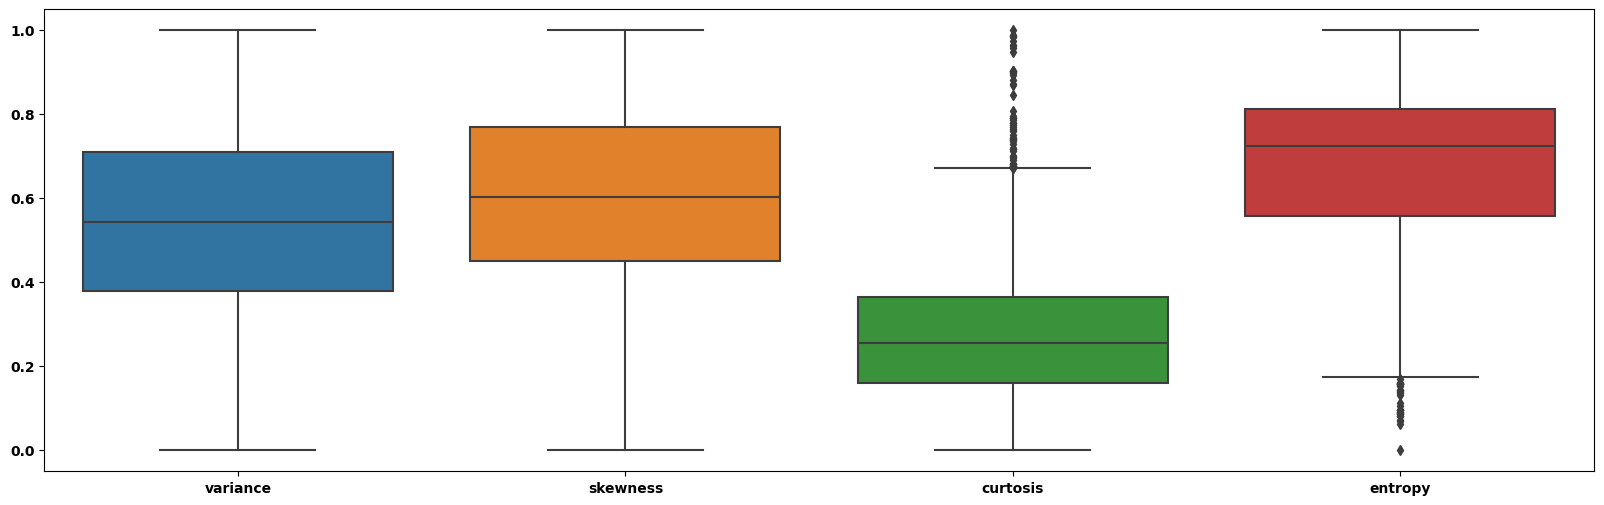

In [154]:
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=100)

In [156]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [157]:
print("Tamaño de train:", X_train.shape[0])
print("Tamaño de test:", X_test.shape[0])

print("\n")

print("Proporción para train:", X_train.shape[0]/df_bank_normal.shape[0])
print("Proporción para test:", X_test.shape[0]/df_bank_normal.shape[0])

print("\n")

print("Suma de ambos conjuntos:", X_train.shape[0] + X_test.shape[0])
print("Tamaño del conjunto de bank normalizado:", df_bank_normal.shape[0])

Tamaño de train: 1097
Tamaño de test: 275


Proporción para train: 0.7995626822157434
Proporción para test: 0.20043731778425655


Suma de ambos conjuntos: 1372
Tamaño del conjunto de bank normalizado: 1372


In [158]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(n_jobs=-1, random_state=100)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)

In [159]:
y_pred_xgb = xgb_classifier.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("f1_score: ", f1_score(y_test, y_pred_xgb, average="weighted"))
print(classification_report(y_test, y_pred_xgb, zero_division=0))

Accuracy:  1.0
f1_score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       112

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



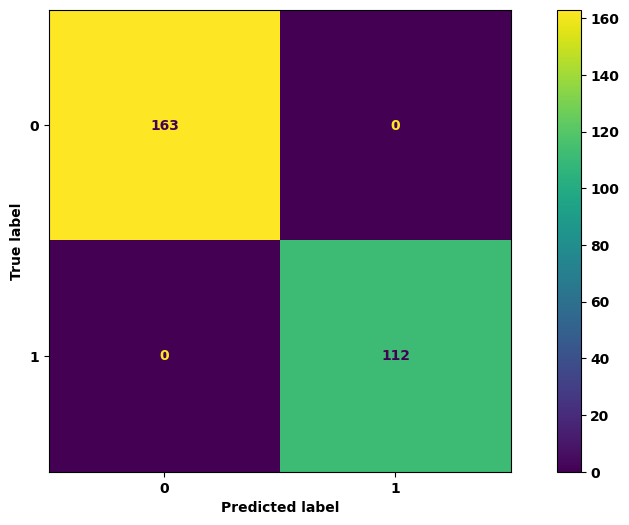

In [161]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb),
                               display_labels=xgb_classifier.classes_)
display.plot()

plt.show()

El mejor valor de n_estimators podría ser = 100 que consigue un Accuracy = 1.0


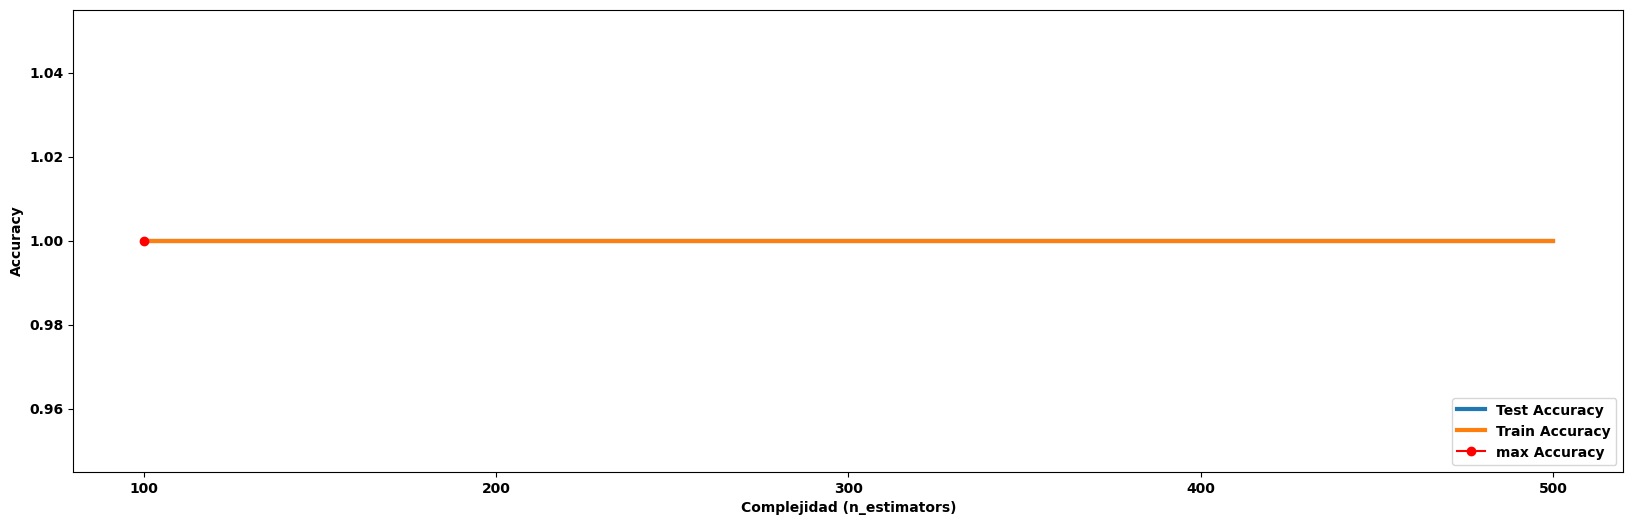

In [162]:
hiper_param_n_arboles = np.arange(100, 501, 100)

train_score_n_arboles = np.zeros(hiper_param_n_arboles.size)
test_score_n_arboles = np.zeros(hiper_param_n_arboles.size)

for i in range(hiper_param_n_arboles.size):
    modelo =XGBClassifier(n_estimators=hiper_param_n_arboles[i],
                          n_jobs=-1,
                          random_state=100)
    modelo.fit(X_train, y_train)
    train_score_n_arboles[i] = accuracy_score(y_train, modelo.predict(X_train))
    test_score_n_arboles[i] = accuracy_score(y_test, modelo.predict(X_test))

print("El mejor valor de n_estimators podría ser =", hiper_param_n_arboles[np.argmax(test_score_n_arboles)],
      "que consigue un Accuracy =", max(test_score_n_arboles))

plt.figure(figsize=(20,6))
plt.plot(hiper_param_n_arboles, test_score_n_arboles, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_n_arboles, train_score_n_arboles, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_n_arboles[np.argmax(test_score_n_arboles)], max(test_score_n_arboles),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_n_arboles)
plt.xlabel('Complejidad (n_estimators)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de max_depth podría ser = 3 que consigue un Accuracy = 1.0


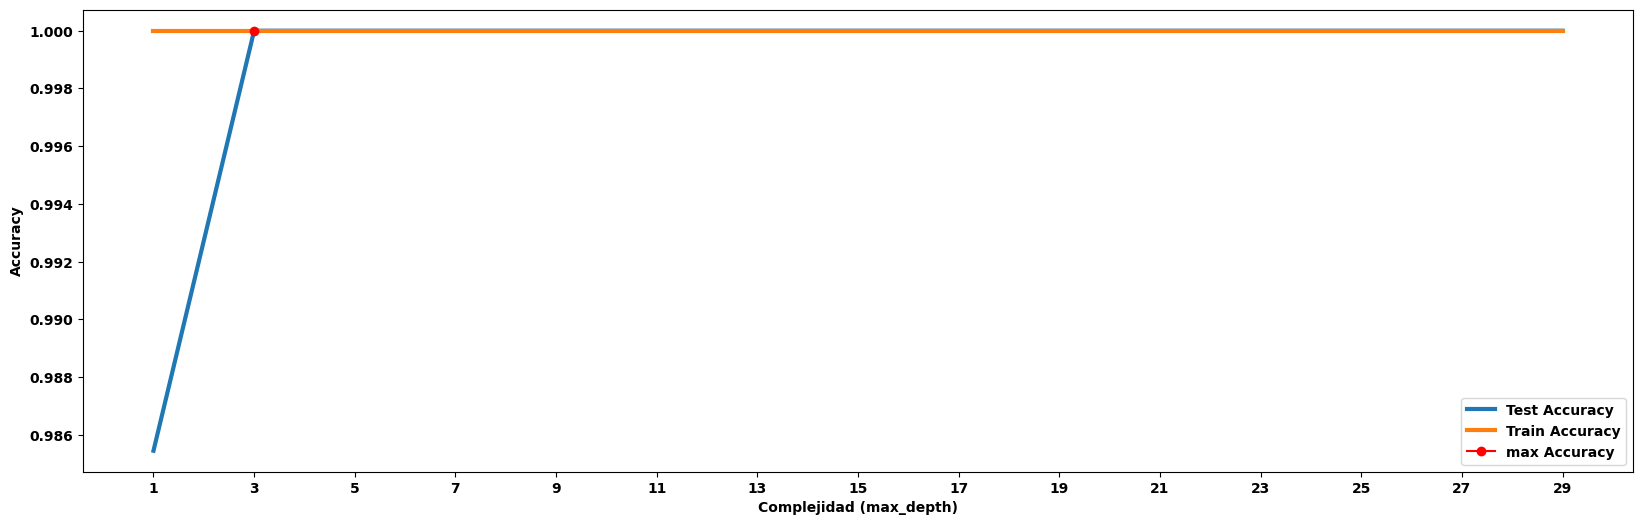

In [163]:
hiper_param_max_depth = np.arange(1, 31, 2)
n_arboles_xgb = hiper_param_n_arboles[np.argmax(test_score_n_arboles)]

train_score_max_depth = np.zeros(hiper_param_max_depth.size)
test_score_max_depth = np.zeros(hiper_param_max_depth.size)

for i in range(hiper_param_max_depth.size):
    modelo =XGBClassifier(max_depth=hiper_param_max_depth[i],
                          n_estimators=n_arboles_xgb,
                          random_state=100,
                          n_jobs=-1)
    modelo.fit(X_train, y_train)
    train_score_max_depth[i] = accuracy_score(y_train, modelo.predict(X_train))
    test_score_max_depth[i] = accuracy_score(y_test, modelo.predict(X_test))

print("El mejor valor de max_depth podría ser =", hiper_param_max_depth[np.argmax(test_score_max_depth)],
      "que consigue un Accuracy =", max(test_score_max_depth))

plt.figure(figsize=(20,6))
plt.plot(hiper_param_max_depth, test_score_max_depth, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_max_depth, train_score_max_depth, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_max_depth[np.argmax(test_score_max_depth)], max(test_score_max_depth),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_max_depth)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de learning_rate podría ser = 0.1 que consigue un Accuracy = 1.0


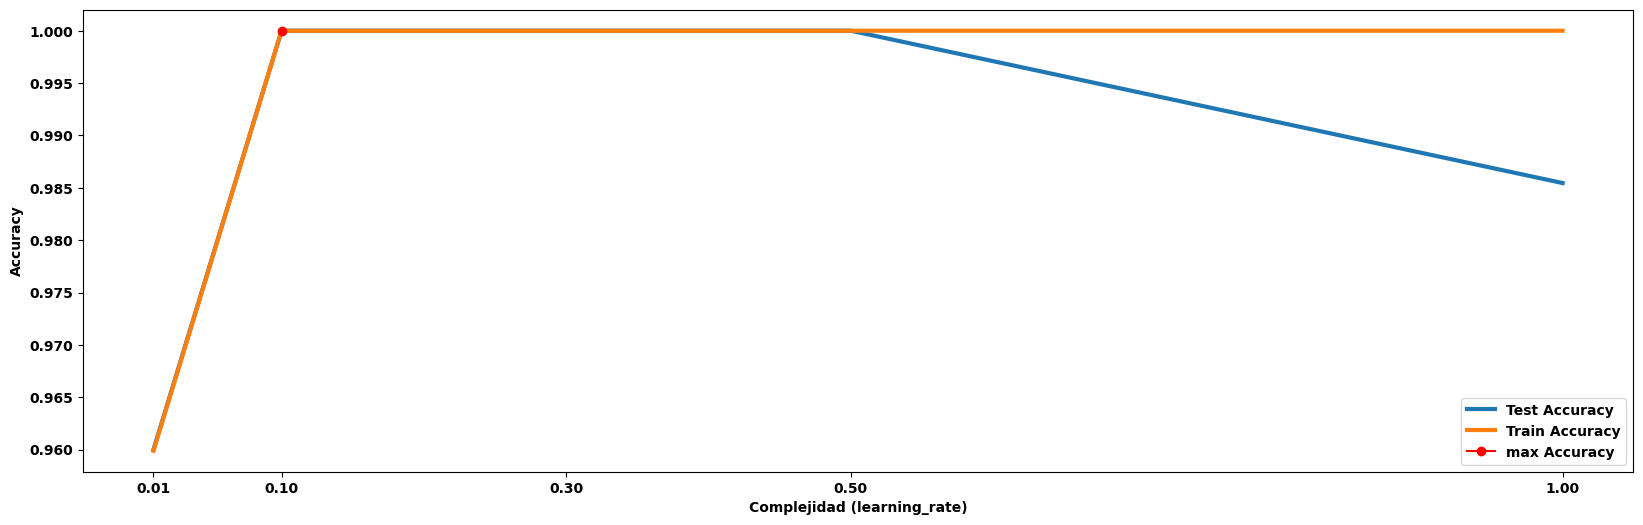

In [164]:
max_depth_xgb = hiper_param_max_depth[np.argmax(test_score_max_depth)]
n_arboles_xgb = hiper_param_n_arboles[np.argmax(test_score_n_arboles)]
hiper_param_learning_rate = [0.01, 0.1, 0.3, 0.5, 1]

train_score_learning_rate = np.zeros(len(hiper_param_learning_rate))
test_score_learning_rate = np.zeros(len(hiper_param_learning_rate))

for i in range(len(hiper_param_learning_rate)):
    modelo =XGBClassifier(learning_rate=hiper_param_learning_rate[i],
                          max_depth=max_depth_xgb,
                          n_estimators=n_arboles_xgb,
                          random_state=100,
                          n_jobs=-1)
    modelo.fit(X_train, y_train)
    train_score_learning_rate[i] = accuracy_score(y_train, modelo.predict(X_train))
    test_score_learning_rate[i] = accuracy_score(y_test, modelo.predict(X_test))

print("El mejor valor de learning_rate podría ser =", hiper_param_learning_rate[np.argmax(test_score_learning_rate)],
      "que consigue un Accuracy =", max(test_score_learning_rate))

plt.figure(figsize=(20,6))
plt.plot(hiper_param_learning_rate, test_score_learning_rate, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_learning_rate, train_score_learning_rate, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_learning_rate[np.argmax(test_score_learning_rate)], max(test_score_learning_rate),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_learning_rate)
plt.xlabel('Complejidad (learning_rate)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [165]:
learning_rate_xgb = hiper_param_learning_rate[np.argmax(test_score_learning_rate)]

modelo_optimo_xgb = XGBClassifier(
    n_jobs=-1,
    max_depth=max_depth_xgb,
    n_estimators=n_arboles_xgb,
    learning_rate=learning_rate_xgb,
    random_state=100
)

modelo_optimo_xgb.fit(X_train, y_train)

y_pred_xgb_optimo = modelo_optimo_xgb.predict(X_test)

In [166]:
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb_optimo))
print("f1_score: ", f1_score(y_test, y_pred_xgb_optimo, average="weighted"))
print(classification_report(y_test, y_pred_xgb_optimo, zero_division=0))

Accuracy:  1.0
f1_score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       112

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



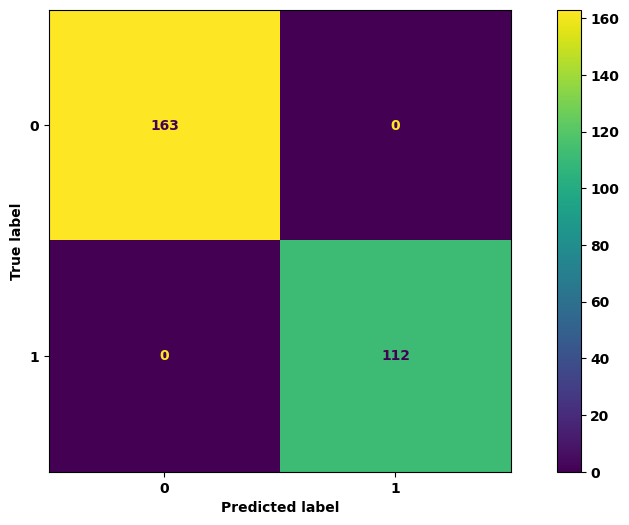

In [167]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb_optimo),
                               display_labels=xgb_classifier.classes_)
display.plot()

plt.show()

La diferencia final del rendimiento del modelo entre training y test es=  0.0


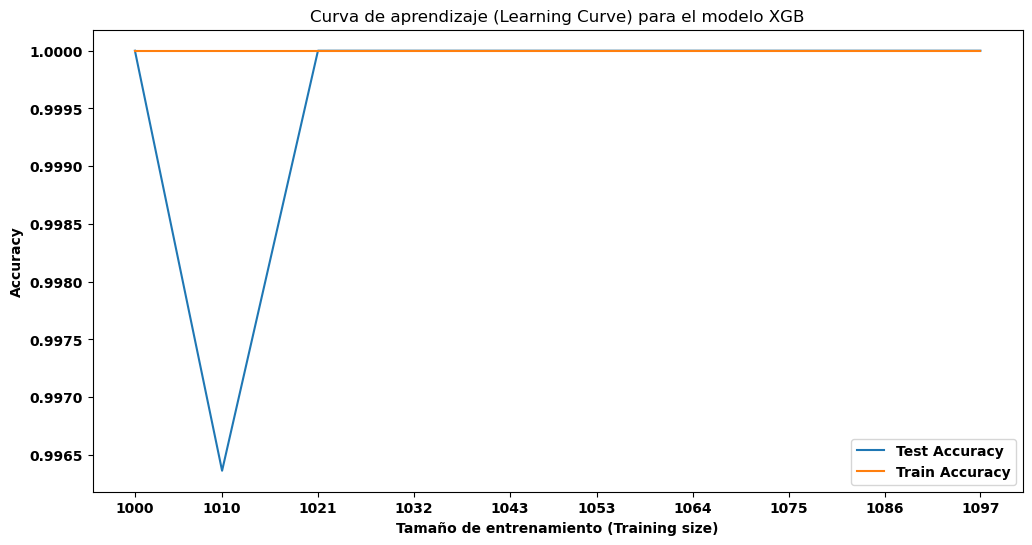

In [168]:
modelo_arbol = XGBClassifier(n_jobs=-1, n_estimators=xgb_classifier.n_estimators, max_depth=xgb_classifier.max_depth, learning_rate=xgb_classifier.learning_rate, random_state=100)

num_samples = np.linspace(1000, X_train.shape[0], 10).astype(int)

train_score = np.zeros(num_samples.size)
test_score = np.zeros(num_samples.size)

for i in range(num_samples.size):
    modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]]))
    test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.xticks(num_samples)
plt.title('Curva de aprendizaje (Learning Curve) para el modelo XGB')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()